In [1]:
import os

import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import thesis.config

In [2]:
use_tex = False
if (use_tex):
    thesis.config.use_tex()
else:
    thesis.config.use_inline()
config_file_path = "/users/wctaylor/wctaylor_thesis_code/config/example_config.json"
thesis.config.config_env(config_file_path)

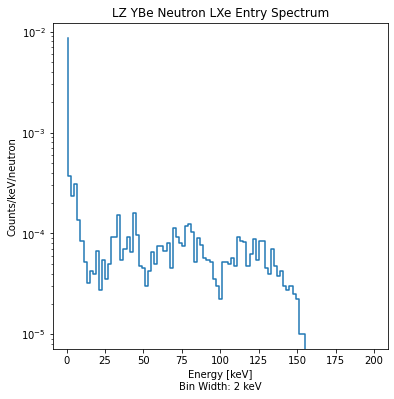

In [3]:
FIG_DPI = 450
figure_dir = os.environ["FIGURE_DIR"]
figure_dir = f"{figure_dir}/activation/"
data_dir = "/users/wctaylor/wctaylor_thesis_code/data/"

neutron_entry_spectrum_file = "ybe_lxe_neutron_entry_spectrum_biekert.txt"
neutron_entry_data = np.loadtxt(f"{data_dir}/{neutron_entry_spectrum_file}",
                                skiprows=1)
bin_width = neutron_entry_data[1,0] - neutron_entry_data[0,0]

fig, axis = plt.subplots(figsize=(6,6))
axis.step(neutron_entry_data[:,0], neutron_entry_data[:,1])
axis.set_xlabel(f"Energy [keV]\n"
                f"Bin Width: {bin_width:.0f} keV")
axis.set_ylabel("Counts/keV/neutron")
# axis.set_xscale("log")
axis.set_yscale("log")
# axis.set_xlim([LOWER_BOUND_X, UPPER_BOUND_X])
# axis.set_ylim(bottom=LOWER_BOUND_Y)
# axis.legend(loc='upper left')
axis.set_title(f"LZ YBe Neutron LXe Entry Spectrum")

plt.show()

In [4]:
counts_per_n = np.sum(neutron_entry_data[:,1]*bin_width)
print(f"LXe entry counts per neutron: {counts_per_n:0.3f}")

# From Andreas and Junsong
# YBe source "births" 120 n/s total
YBE_N_PER_S = 120
print(f"LXe entry rate: {YBE_N_PER_S*counts_per_n:0.3f} n/s")

# Also from Andreas and Junsong
# 200 goldent events / 24 hours
YBE_GOLDEN_RATE_PER_S = 200/24/3600 
print(f"Golden event rate: {YBE_GOLDEN_RATE_PER_S:.3f}/s")

LXe entry counts per neutron: 0.029
LXe entry rate: 3.430 n/s
Golden event rate: 0.002/s
